Task 3: Proximity Analysis (using Population Centers)

Regions to analyze:
- Lima
- Loreto

In [1]:
pip install chardet

  Using cached chardet-5.2.0-py3-none-any.whl.metadata (3.4 kB)
Using cached chardet-5.2.0-py3-none-any.whl (199 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet

In [7]:
!pip install folium
!pip install branca

In [8]:
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

1. From Population Centers, compute the centroid of each locality (or use the provided geometry centroids).

In [13]:
# Subimos el shape file de distritos
districts = gpd.read_file(r'Distritos/DISTRITOS.shp')

In [20]:
districts = districts.to_crs(epsg=4326)
districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
districts

IDDPTO DEPARTAMEN IDPROV      PROVINCIA  IDDIST                DISTRITO  \
0        10    HUANUCO   1009    PUERTO INCA  100902         CODO DEL POZUZO   
1        10    HUANUCO   1009    PUERTO INCA  100904             TOURNAVISTA   
2        25    UCAYALI   2503     PADRE ABAD  250305  ALEXANDER VON HUMBOLDT   
3        25    UCAYALI   2503     PADRE ABAD  250302                 IRAZOLA   
4        25    UCAYALI   2503     PADRE ABAD  250304                 NESHUYA   
...     ...        ...    ...            ...     ...                     ...   
1868     10    HUANUCO   1006  LEONCIO PRADO  100608         CASTILLO GRANDE   
1869     10    HUANUCO   1006  LEONCIO PRADO  100609            PUEBLO NUEVO   
1870     10    HUANUCO   1006  LEONCIO PRADO  100610   SANTO DOMINGO DE ANDA   
1871     21       PUNO   2111      SAN ROMAN  211105              SAN MIGUEL   
1872     15       LIMA   1508         HUAURA  150806                  HUAURA   

                     CAPITAL CODCCPP  AREA FUENTE  \
0            CODO DEL POZUZO    0001     1   INEI   
1                TOURNAVISTA    0001     1   INEI   
2     ALEXANDER VON HUMBOLDT    0001     1   INEI   
3              SAN ALEJANDRO    0001     1   INEI   
4               MONTE ALEGRE    0001     1   INEI   
...                      ...     ...   ...    ...   
1868         CASTILLO GRANDE    0001     1   INEI   
1869            PUEBLO NUEVO    0001     1   INEI   
1870                   PACAE    0001     1   INEI   
1871              SAN MIGUEL    0001     1   INEI   
1872                  HUAURA    0001     1   INEI   

                                               geometry  
0     POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975...  
1     POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...  
2     POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...  
3     POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...  
4     POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...  
...                                                 ...  
1868  POLYGON ((-76.08083 -9.13017, -76.08026 -9.130...  
1869  POLYGON ((-75.88828 -9.00906, -75.88756 -9.010...  
1870  POLYGON ((-75.91141 -8.88593, -75.91182 -8.886...  
1871  POLYGON ((-70.13203 -15.33382, -70.12355 -15.3...  
1872  POLYGON ((-77.3763 -10.89734, -77.37604 -10.89...  

[1873 rows x 11 columns]

<Axes: >

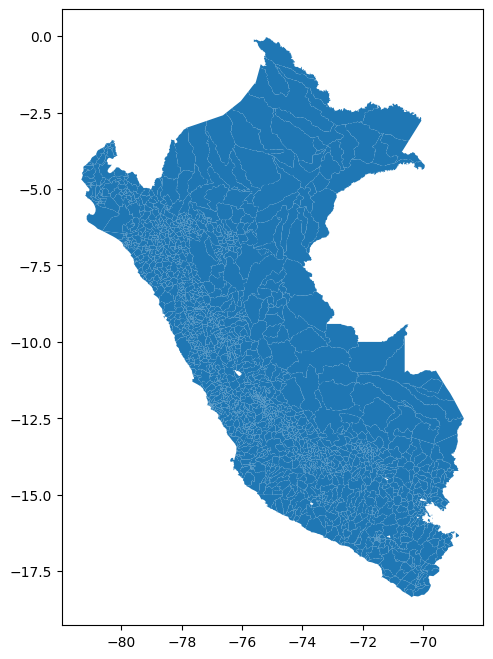

In [14]:
districts.plot(figsize=(8, 8))

In [21]:
# Filtrar solo Lima y Loreto
distritos_filtrados = districts[
    districts["DEPARTAMEN"].isin(["LIMA", "LORETO"])
]

<Axes: >

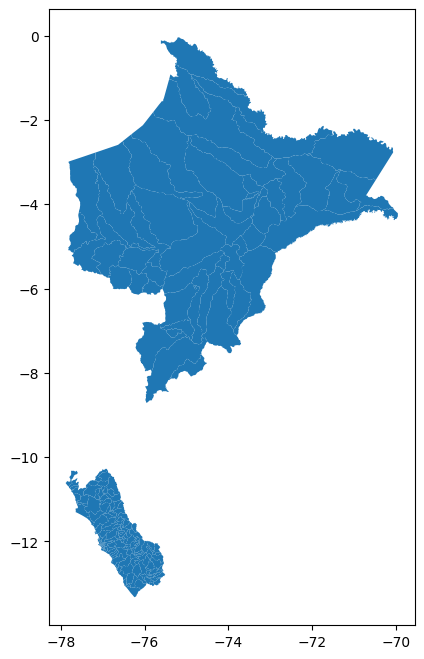

In [22]:
distritos_filtrados.plot(figsize=(8, 8))

In [23]:
lima = districts[districts["DEPARTAMEN"] == "LIMA"]

In [24]:
loreto = districts[districts["DEPARTAMEN"] == "LORETO"]

Text(0.5, 1.0, 'Distritos de Lima')

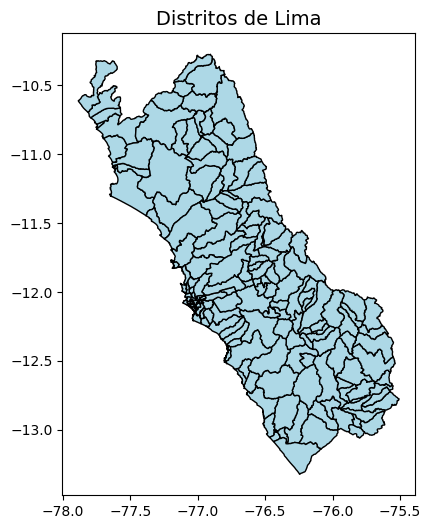

In [25]:
# Plotear Lima
ax = lima.plot(figsize=(6, 6), color="lightblue", edgecolor="black")
ax.set_title("Distritos de Lima", fontsize=14)

Text(0.5, 1.0, 'Distritos de Loreto')

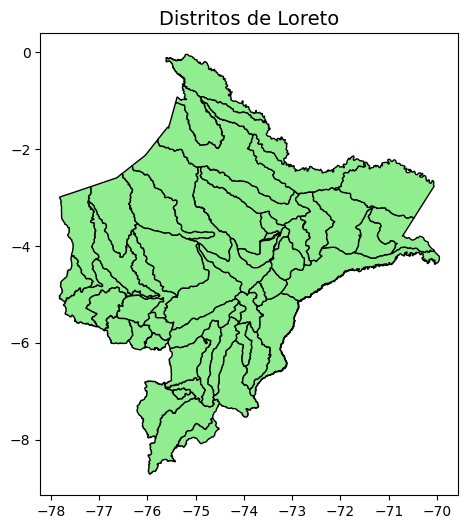

In [26]:
# Plotear Loreto
ax = loreto.plot(figsize=(6, 6), color="lightgreen", edgecolor="black")
ax.set_title("Distritos de Loreto", fontsize=14)

In [17]:
# Upload shape file at population center level
centroids = gpd.read_file(r'CCPP_0/CCPP_IGN100K.shp')

In [18]:
# Ensure the centroids dataset is in WGS-84 (EPSG:4326)
centroids = centroids.to_crs(epsg=4326)
centroids.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
centroids

OBJECTID         NOM_POBLAD FUENTE      CÓDIGO CAT_POBLAD        DIST  \
0              1         PANDISHARI   INEI  2502010002      OTROS    RAYMONDI   
1              2            CHICOSA   INEI  2502010003      OTROS    RAYMONDI   
2              3               RAYA    IGN  2502010004      OTROS    RAYMONDI   
3              4        PENSILVANIA   INEI  2502010005      OTROS    RAYMONDI   
4              5        PONTE VEDRA   INEI  2502010006    CASERÍO    RAYMONDI   
...          ...                ...    ...         ...        ...         ...   
136582    136584               IPAN   INEI        None       None    ZORRITOS   
136583    136585              URBAN   INEI        None       None    ZORRITOS   
136584    136586  PAJONAL MAJONTONI    IGN        None       None    RAYMONDI   
136585    136587        AGUA BLANCA   INEI  2501020043    CASERÍO  CAMPOVERDE   
136586    136588          PRIMAVERA   INEI  2503020032    CASERÍO     IRAZOLA   

                         PROV      DEP CÓD_INT             CATEGORIA  \
0                     ATALAYA  UCAYALI    2050  Centro Poblado Menor   
1                     ATALAYA  UCAYALI    2050  Centro Poblado Menor   
2                     ATALAYA  UCAYALI    2350  Centro Poblado Menor   
3                     ATALAYA  UCAYALI    2050  Centro Poblado Menor   
4                     ATALAYA  UCAYALI    2050  Centro Poblado Menor   
...                       ...      ...     ...                   ...   
136582  CONTRALMIRANTE VILLAR   TUMBES    None                  None   
136583  CONTRALMIRANTE VILLAR   TUMBES    None                  None   
136584                ATALAYA  UCAYALI    2049  Centro Poblado Menor   
136585       CORONEL PORTILLO  UCAYALI    1953  Centro Poblado Menor   
136586             PADRE ABAD  UCAYALI    1853  Centro Poblado Menor   

               X         Y           N_BUSQDA                     geometry  
0      -74.06462 -10.37129         PANDISHARI  POINT (-74.06462 -10.37129)  
1      -74.06153 -10.37852            CHICOSA  POINT (-74.06153 -10.37852)  
2      -72.94118 -10.33043               RAYA  POINT (-72.94118 -10.33043)  
3      -74.05988 -10.40401        PENSILVANIA  POINT (-74.05988 -10.40401)  
4      -74.03788 -10.41809        PONTE VEDRA  POINT (-74.03787 -10.41809)  
...          ...       ...                ...                          ...  
136582 -81.02462 -81.02462               None   POINT (-81.02462 -4.09728)  
136583 -80.84055 -80.84055               None   POINT (-80.84055 -4.06801)  
136584 -74.35804 -74.35804  PAJONAL MAJONTONI   POINT (-74.35804 -10.7274)  
136585 -74.78089 -74.78089        AGUA BLANCA   POINT (-74.78089 -8.60511)  
136586 -75.02997 -75.02997          PRIMAVERA   POINT (-75.02997 -8.87639)  

[136587 rows x 14 columns]

<Axes: >

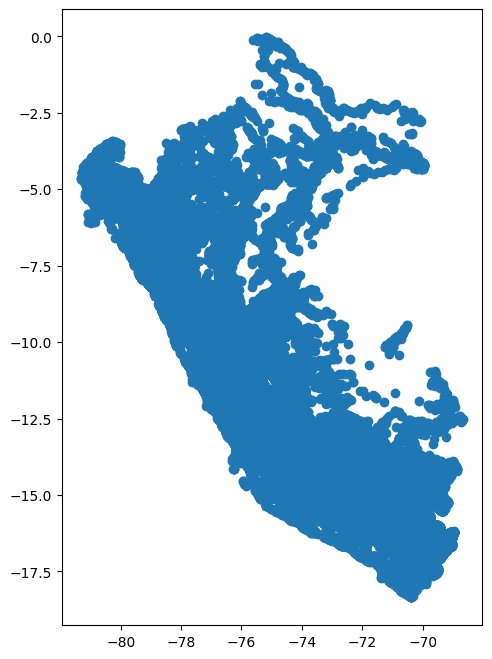

In [12]:
centroids.plot(figsize=(8, 8))

In [64]:
# Filtrar centroides de Lima y Loreto usando la columna DEP
centroids_lima = centroids[centroids["DEP"] == "LIMA"]
centroids_loreto = centroids[centroids["DEP"] == "LORETO"]

# Revisar cuántos registros hay en cada uno
print("Centroides en Lima:", len(centroids_lima))
print("Centroides en Loreto:", len(centroids_loreto))

Centroides en Lima: 7615
Centroides en Loreto: 3447


Text(0.5, 1.0, 'Centroides de Loreto')

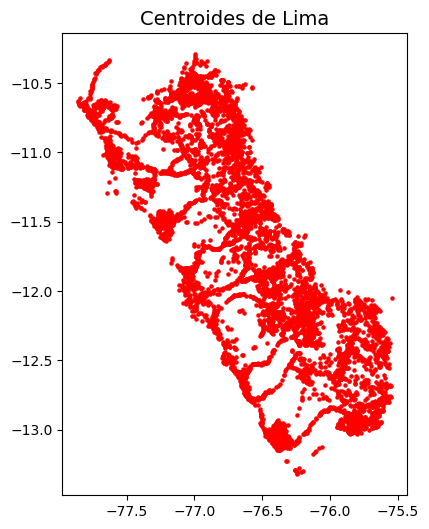

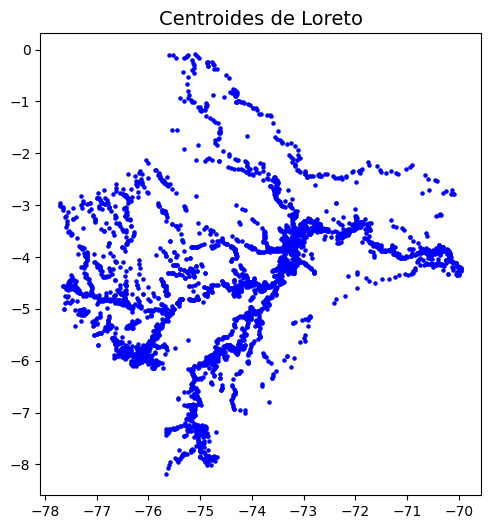

In [65]:
# Plotear centroides de Lima
ax = centroids_lima.plot(figsize=(6,6), color="red", markersize=5)
ax.set_title("Centroides de Lima", fontsize=14)

# Plotear centroides de Loreto
ax = centroids_loreto.plot(figsize=(6,6), color="blue", markersize=5)
ax.set_title("Centroides de Loreto", fontsize=14)

Centroides originales: 136587
Centroides en Lima: 7610


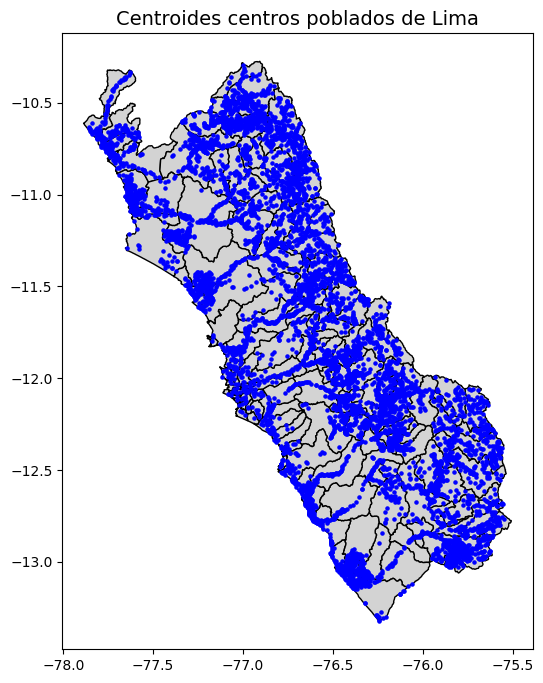

In [71]:
## Asegurar mismo CRS
centroids = centroids.to_crs(lima.crs)

# Quedarse solo con los centroides dentro de Lima
centroids_lima_clean = gpd.sjoin(
    centroids, lima, how="inner", predicate="within"
)

print(f"Centroides originales: {len(centroids)}")
print(f"Centroides en Lima: {len(centroids_lima_clean)}")

# Plotear Lima + centroides
fig, ax = plt.subplots(figsize=(8, 8))
lima.plot(ax=ax, color="lightgray", edgecolor="black")
centroids_lima_clean.plot(ax=ax, color="blue", markersize=5)
ax.set_title("Centroides centros poblados de Lima", fontsize=14)
plt.show()

Centroides originales: 136587
Centroides en Loreto: 3426


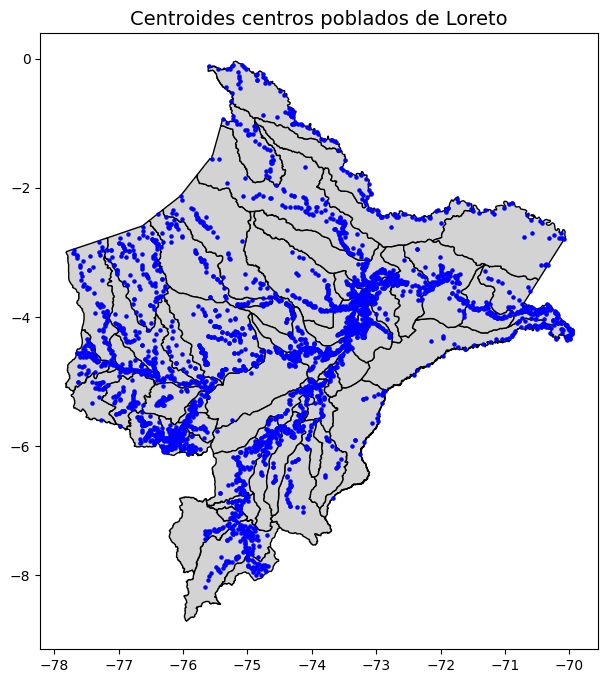

In [70]:
# Nos aseguramos que los centroides estén en el mismo CRS que Loreto
centroids = centroids.to_crs(loreto.crs)

# Filtramos solo los centroides que caen dentro de Loreto
centroids_loreto_clean = gpd.sjoin(centroids, loreto, how="inner", predicate="within")

print(f"Centroides originales: {len(centroids)}")
print(f"Centroides en Loreto: {len(centroids_loreto_clean)}")

# Plotear distritos de Loreto + centroides
fig, ax = plt.subplots(figsize=(8, 8))
loreto.plot(ax=ax, color="lightgray", edgecolor="black")
centroids_loreto_clean.plot(ax=ax, color="blue", markersize=5)
ax.set_title("Centroides centros poblados de Loreto", fontsize=14)
plt.show()

# 2. For each centroid, calculate the number of operational hospitals within a 10 km buffer.

In [40]:
# Cargamos archivo de hospitales
ipress = pd.read_csv("IPRESS.csv", encoding="latin-1")

In [ ]:
ipress

In [55]:
# Filtrar hospitales en funcionamiento y con coordenadas válidas
ipress_filtered = ipress[
    (ipress["Condición"] == "EN FUNCIONAMIENTO") &
    (ipress["NORTE"].notnull()) &
    (ipress["ESTE"].notnull())
].copy()  # <-- usamos copy() para evitar warnings

# Renombrar columnas
ipress_filtered = ipress_filtered.rename(columns={
    "NORTE": "LATITUD",
    "ESTE": "LONGITUD"
})

# Convertir a GeoDataFrame
ipress_gdf = gpd.GeoDataFrame(
    ipress_filtered,
    geometry=gpd.points_from_xy(ipress_filtered["LATITUD"], ipress_filtered["LONGITUD"]),
    crs="EPSG:4326"  # WGS84
)

In [108]:
# Filtrar solo hospitales de Lima
ipress_lima = ipress_gdf[ipress_gdf["Departamento"] == "LIMA"]

# Filtrar solo hospitales de Loreto
ipress_loreto = ipress_gdf[ipress_gdf["Departamento"] == "LORETO"]

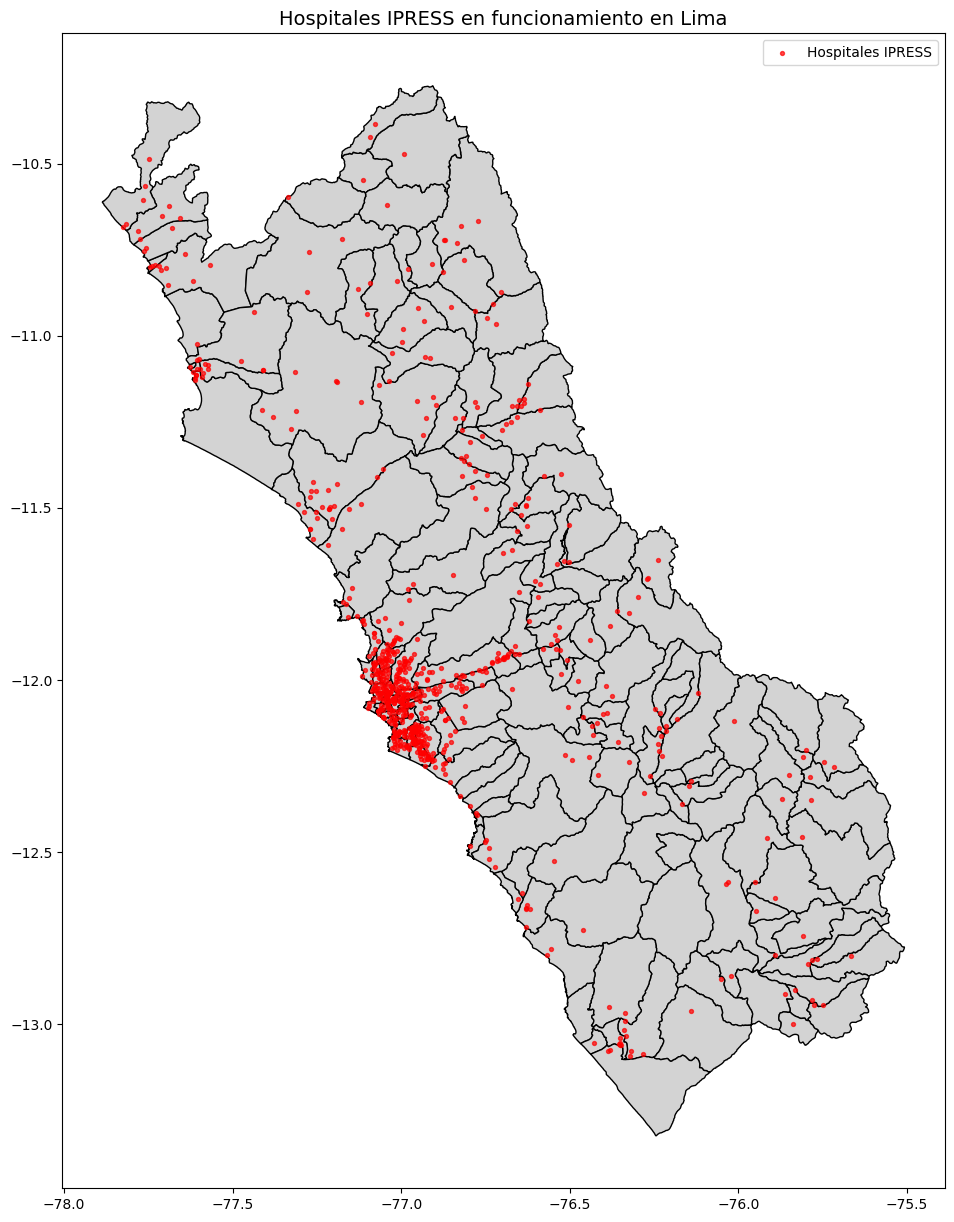

In [60]:
######################################################
# Filtrar solo hospitales dentro de Lima
ipress_lima_in = gpd.sjoin(ipress_lima, lima, predicate="within")

# Plotear
fig, ax = plt.subplots(figsize=(15, 15))

lima.plot(ax=ax, color="lightgray", edgecolor="black")
ipress_lima_in.plot(ax=ax, color="red", markersize=8, alpha=0.7, label="Hospitales IPRESS")

ax.set_title("Hospitales IPRESS en funcionamiento, y centros poblados, en Lima", fontsize=14)
ax.legend()
plt.show()

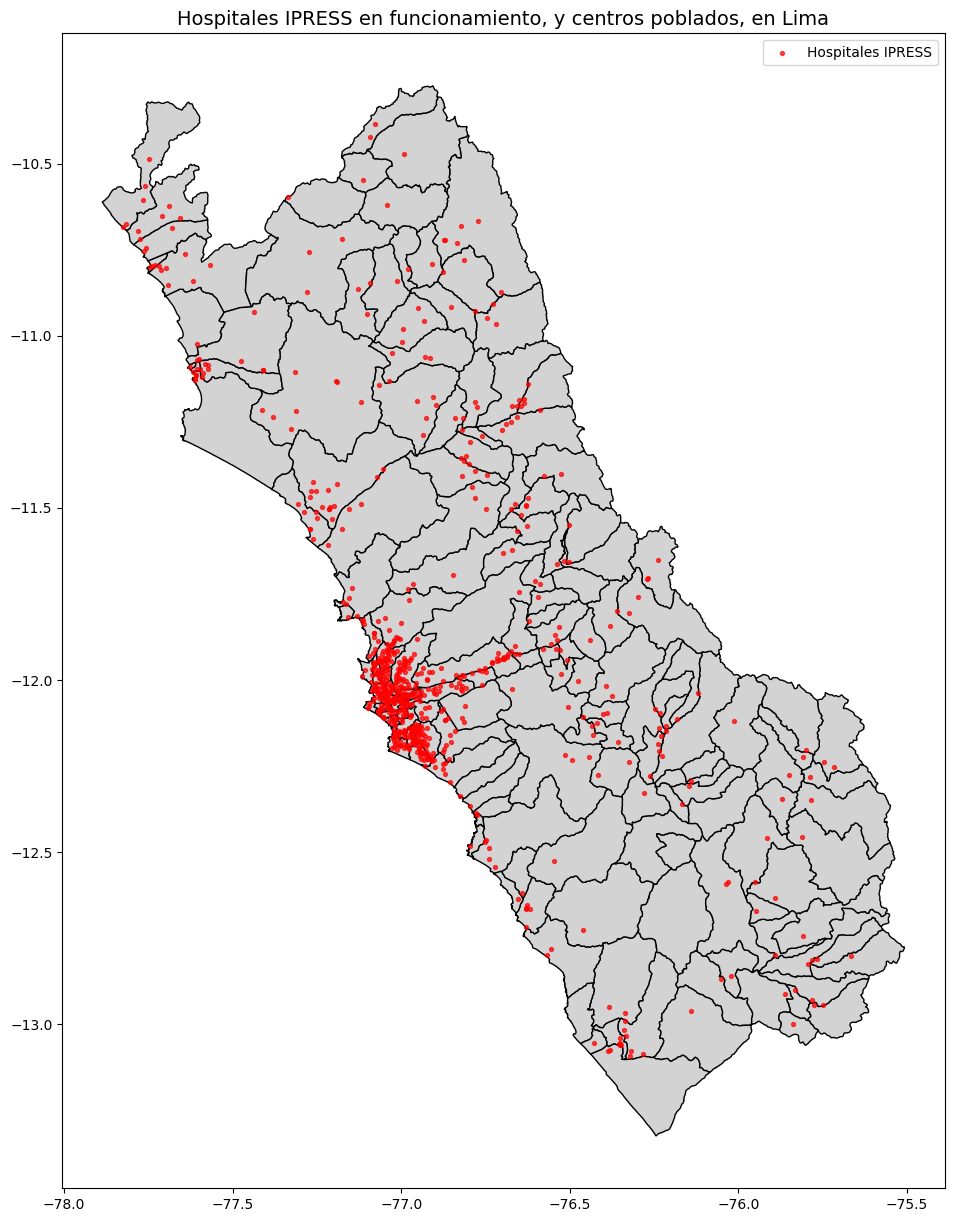

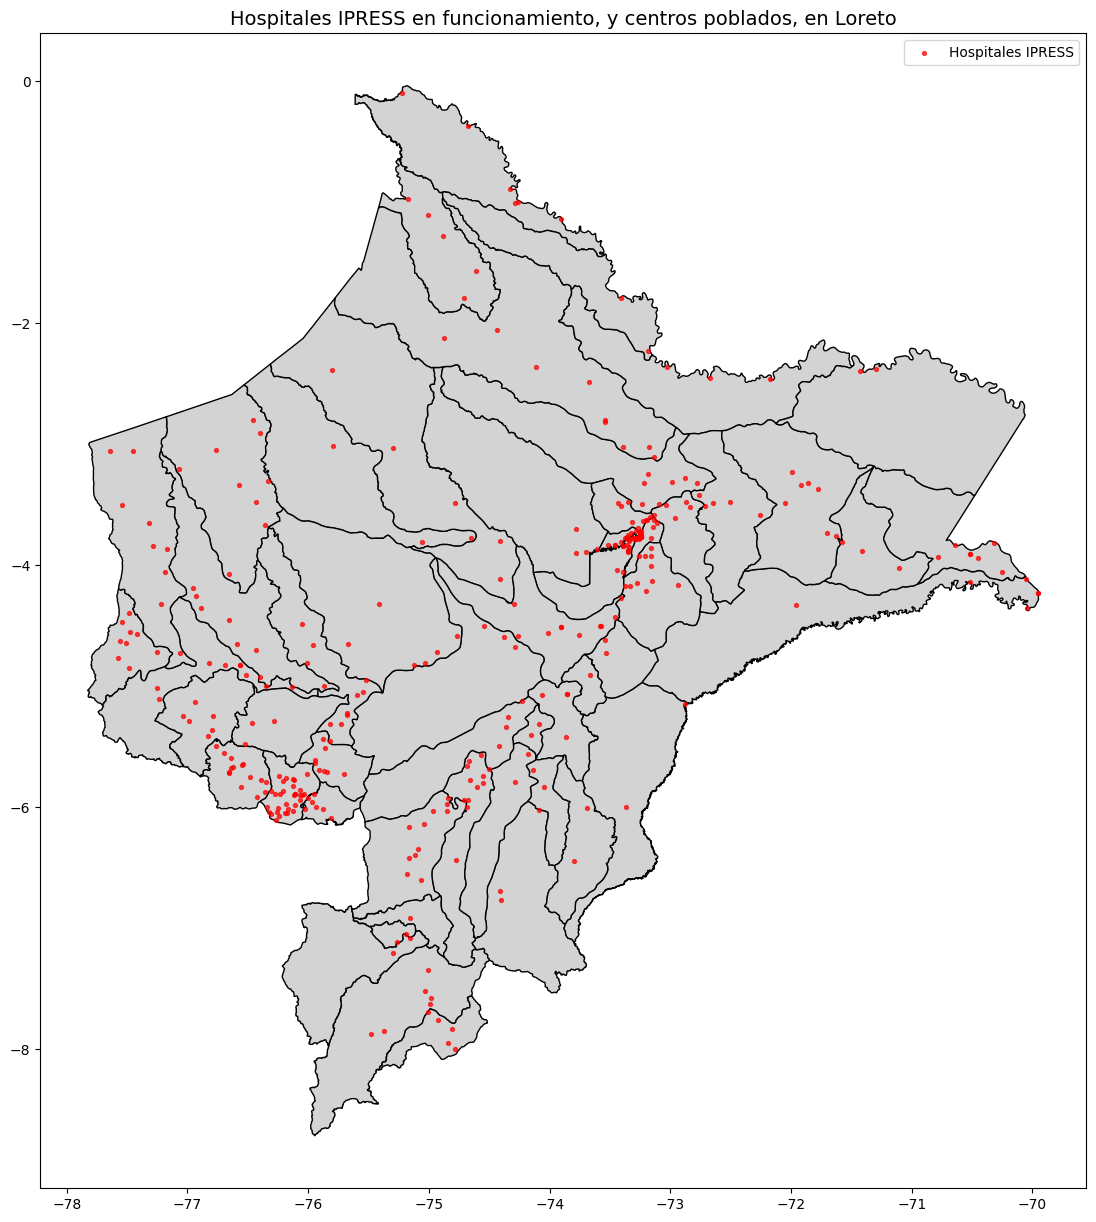

In [113]:
# Lista de departamentos y sus GeoDataFrames correspondientes
departamentos = [
    ("Lima", lima, ipress_lima),
    ("Loreto", loreto, ipress_loreto)
]

for nombre, depto_gdf, ipress_gdf in departamentos:
    # Filtrar hospitales dentro del departamento
    ipress_in = gpd.sjoin(ipress_gdf, depto_gdf, predicate="within")
    
    # Plotear
    fig, ax = plt.subplots(figsize=(15, 15))
    depto_gdf.plot(ax=ax, color="lightgray", edgecolor="black")
    ipress_in.plot(ax=ax, color="red", markersize=8, alpha=0.7, label="Hospitales IPRESS")
    
    ax.set_title(f"Hospitales IPRESS en funcionamiento, y centros poblados, en {nombre}", fontsize=14)
    ax.legend()
    plt.show()

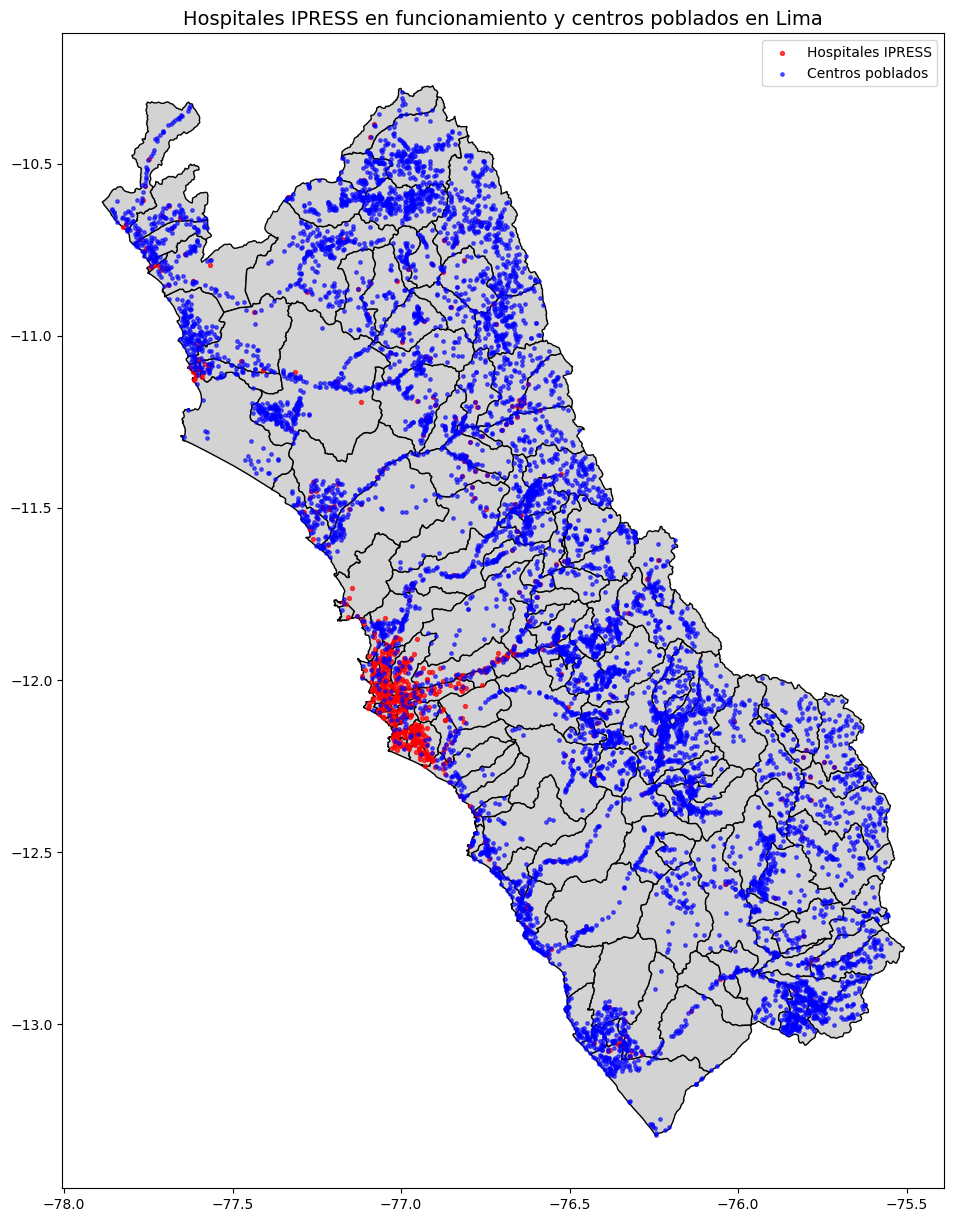

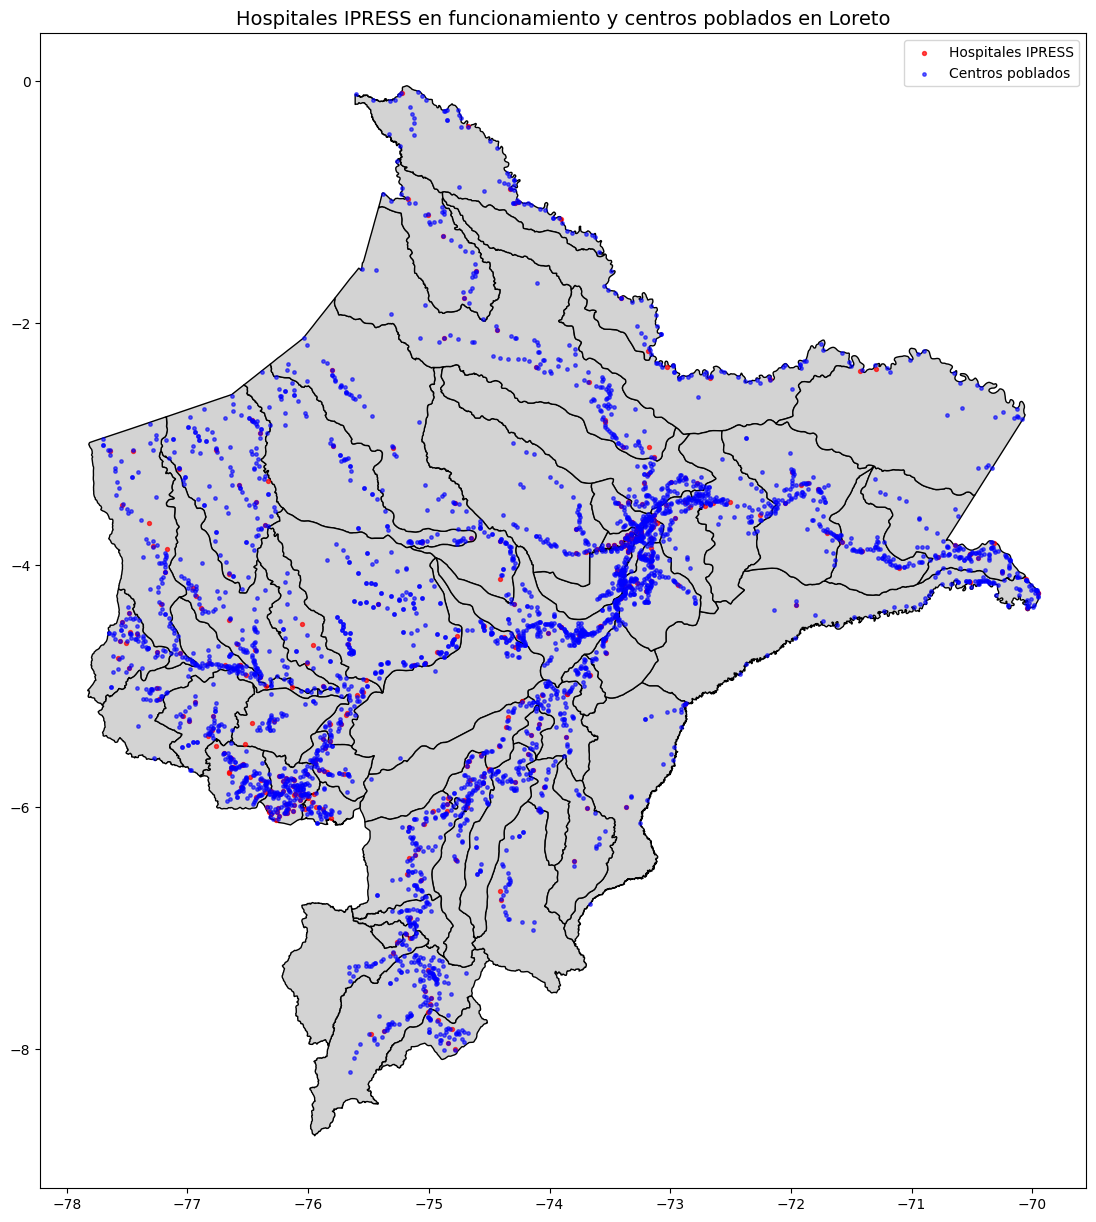

In [114]:
# Lista de departamentos y sus GeoDataFrames correspondientes
departamentos = [
    ("Lima", lima, ipress_lima, centroids_lima_clean),
    ("Loreto", loreto, ipress_loreto, centroids_loreto_clean)
]

for nombre, depto_gdf, ipress_gdf, centroids_gdf in departamentos:
    # Aseguramos que los centroides estén en el mismo CRS que el departamento
    centroids_aligned = centroids_gdf.to_crs(depto_gdf.crs)
    
    # Filtrar solo hospitales dentro del departamento
    ipress_in = gpd.sjoin(ipress_gdf, depto_gdf, predicate="within")
    
    # Plotear
    fig, ax = plt.subplots(figsize=(15, 15))
    
    # Distritos del departamento
    depto_gdf.plot(ax=ax, color="lightgray", edgecolor="black")
    
    # Hospitales IPRESS dentro del departamento
    ipress_in.plot(ax=ax, color="red", markersize=8, alpha=0.7, label="Hospitales IPRESS")
    
    # Centros poblados (centroides)
    centroids_aligned.plot(ax=ax, color="blue", markersize=6, alpha=0.6, label="Centros poblados")
    
    # Título y leyenda
    ax.set_title(f"Hospitales IPRESS en funcionamiento y centros poblados en {nombre}", fontsize=14)
    ax.legend()
    plt.show()

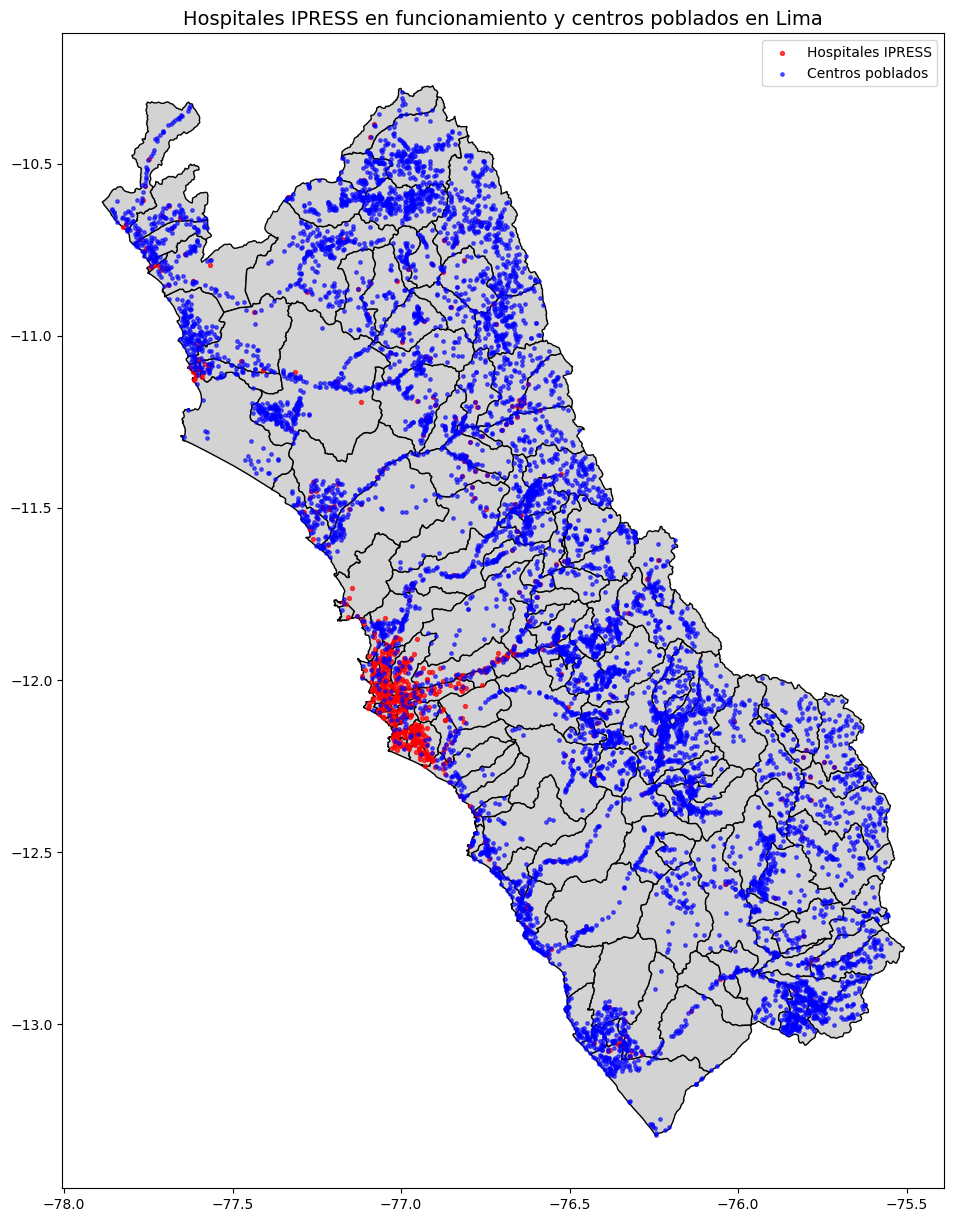

In [73]:
################################################################################
# Aseguramos que ambos datasets estén en el mismo CRS
centroids_lima = centroids_lima.to_crs(lima.crs)

# Filtrar solo hospitales dentro de Lima
ipress_lima_in = gpd.sjoin(ipress_lima, lima, predicate="within")

# Plotear
fig, ax = plt.subplots(figsize=(15, 15))

# Distritos de Lima
lima.plot(ax=ax, color="lightgray", edgecolor="black")

# Hospitales IPRESS dentro de Lima
ipress_lima_in.plot(ax=ax, color="red", markersize=8, alpha=0.7, label="Hospitales IPRESS")

# Centros poblados (centroides)
centroids_lima_clean.plot(ax=ax, color="blue", markersize=6, alpha=0.6, label="Centros poblados")

# Título y leyenda
ax.set_title("Hospitales IPRESS en funcionamiento y centros poblados en Lima", fontsize=14)
ax.legend()
plt.show()


# 3. Identify (per region):
# - The population center with the fewest hospitals nearby (isolation).
# - The population center with the most hospitals nearby (concentration).

In [77]:
#######################################################################
# 1. Asegurar que todos los datos están en el mismo CRS proyectado (metros)
lima_proj = lima.to_crs("EPSG:32718")  
ipress_lima_in_proj = ipress_lima_in.to_crs("EPSG:32718")
centroids_lima_clean_proj = centroids_lima_clean.to_crs("EPSG:32718")

# 2. Crear buffers de 10 km alrededor de cada centro poblado
centroids_lima_clean_proj["buffer_10km"] = centroids_lima_clean_proj.buffer(10000)

# 3. Convertir esos buffers en un GeoDataFrame separado
buffers = centroids_lima_clean_proj.set_geometry("buffer_10km")

In [115]:
# Lista de departamentos y sus centroides correspondientes
departamentos = [
    ("Lima", lima, centroids_lima_clean),
    ("Loreto", loreto, centroids_loreto_clean)
]

# Diccionario para guardar los buffers de cada departamento
buffers_dict = {}

for nombre, depto_gdf, centroids_gdf in departamentos:
    # 1. Asegurar CRS proyectado (metros)
    depto_proj = depto_gdf.to_crs("EPSG:32718")
    centroids_proj = centroids_gdf.to_crs("EPSG:32718")
    
    # 2. Crear buffers de 10 km alrededor de cada centro poblado
    centroids_proj["buffer_10km"] = centroids_proj.buffer(10000)
    
    # 3. Convertir esos buffers en un GeoDataFrame separado
    buffers = centroids_proj.set_geometry("buffer_10km")
    
    # Guardar en el diccionario
    buffers_dict[nombre] = buffers

# Ejemplo de acceso a los buffers de Lima
buffers_lima = buffers_dict["Lima"]
buffers_loreto = buffers_dict["Loreto"]


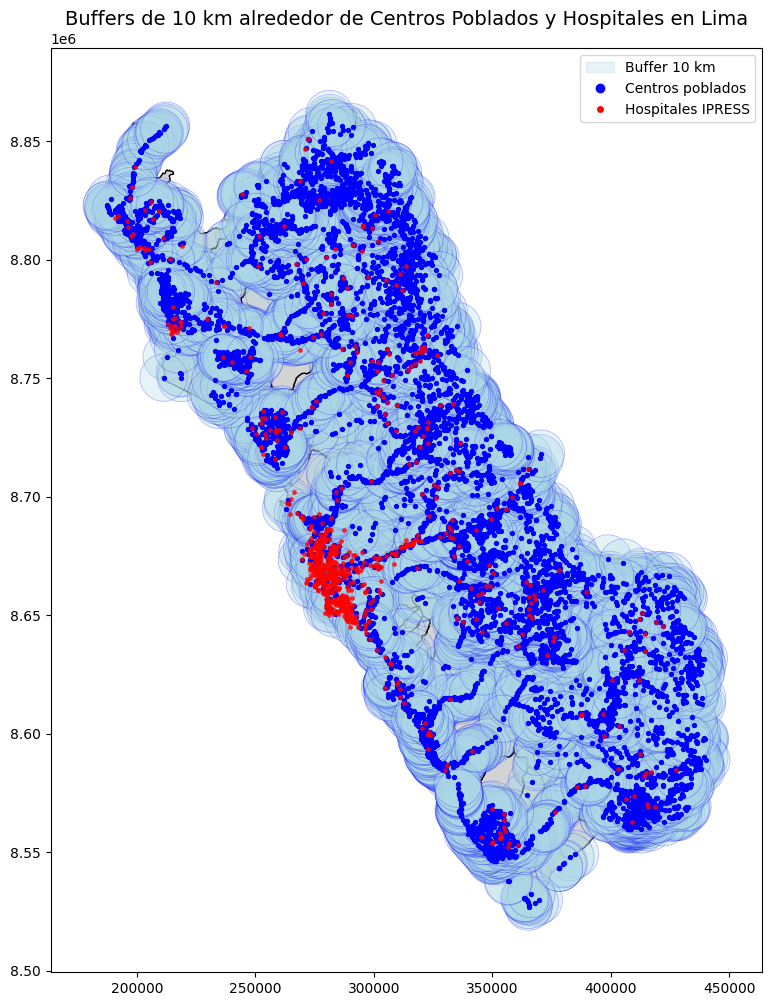

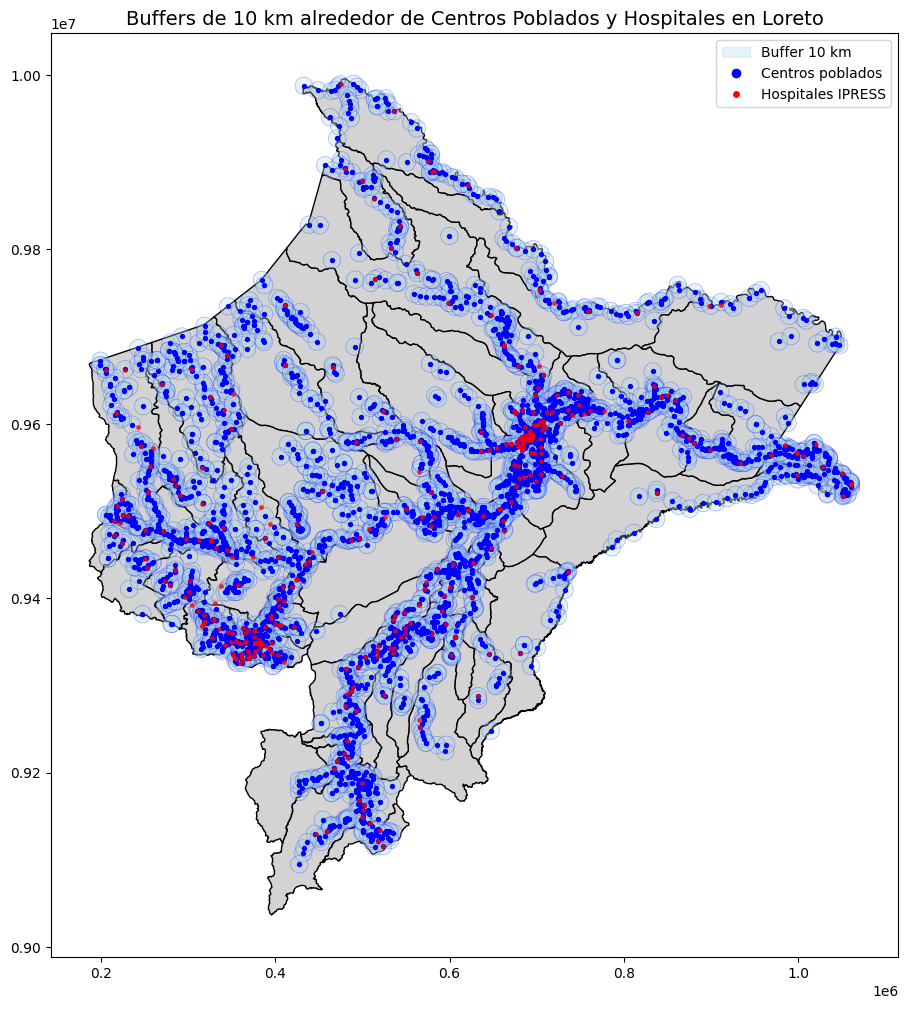

In [120]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# --- Lista de departamentos y sus GeoDataFrames ---
departamentos = [
    ("Lima", lima, ipress_lima, centroids_lima_clean),
    ("Loreto", loreto, ipress_loreto, centroids_loreto_clean)
]

for nombre, depto_gdf, ipress_gdf, centroids_gdf in departamentos:
    
    # --- 1. Filtrar hospitales dentro del departamento ---
    ipress_in = gpd.sjoin(ipress_gdf, depto_gdf, predicate="within")
    
    # --- 2. Asegurar CRS proyectado (metros) ---
    depto_proj = depto_gdf.to_crs("EPSG:32718")
    ipress_proj = ipress_in.to_crs("EPSG:32718")
    centroids_proj = centroids_gdf.to_crs("EPSG:32718")
    
    # --- 3. Crear buffers de 10 km alrededor de cada centro poblado ---
    centroids_proj["buffer_10km"] = centroids_proj.buffer(10000)
    buffers_gdf = centroids_proj.set_geometry("buffer_10km")
    
    # --- 4. Plotear ---
    fig, ax = plt.subplots(figsize=(12, 12))
    
    # Distritos / departamento
    depto_proj.plot(ax=ax, color="lightgray", edgecolor="black")
    
    # Buffers
    buffers_gdf.plot(ax=ax, color="lightblue", alpha=0.3, edgecolor="blue", linewidth=0.5)
    
    # Centroides en azul
    centroids_proj.plot(ax=ax, color="blue", markersize=8, label="Centros poblados")
    
    # Hospitales en rojo
    ipress_proj.plot(ax=ax, color="red", markersize=6, alpha=0.7, label="Hospitales IPRESS")
    
    # --- 5. Leyenda completa ---
    buffer_patch = mpatches.Patch(color="lightblue", alpha=0.3, label="Buffer 10 km")
    centroid_marker = Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Centros poblados')
    hospital_marker = Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=6, label='Hospitales IPRESS')
    
    ax.legend(handles=[buffer_patch, centroid_marker, hospital_marker], loc="upper right")
    
    ax.set_title(f"Buffers de 10 km alrededor de Centros Poblados y Hospitales en {nombre}", fontsize=14)
    plt.show()


In [123]:
# 1. Filtrar hospitales dentro de Lima y Loreto
ipress_lima_in = gpd.sjoin(ipress_lima, lima, predicate="within")
ipress_loreto_in = gpd.sjoin(ipress_loreto, loreto, predicate="within")

# 2. Proyectar al CRS UTM (metros) para poder trabajar con buffers
ipress_lima_in_proj = ipress_lima_in.to_crs("EPSG:32718") 
ipress_lima_in_proj = ipress_loreto_in.to_crs("EPSG:32718")

In [127]:
## --- Lista de departamentos con sus hospitales proyectados y buffers ---
departamentos = [
    ("Lima", ipress_lima_in_proj, buffers_lima),
    ("Loreto", ipress_loreto_in_proj, buffers_loreto)
]

# Diccionario para guardar resultados
hospitals_in_buffers_dict = {}

for nombre, ipress_proj, buffers_gdf in departamentos:
    # Unir hospitales con buffers, evitando conflicto de 'index_right'
    hospitals_in_buffers = gpd.sjoin(
        ipress_proj,       # hospitales (puntos)
        buffers_gdf,       # buffers de 10 km (polígonos)
        how="left",
        predicate="within",
        rsuffix="_buffer"  # evita conflicto
    )
    
    # Guardar resultado en el diccionario
    hospitals_in_buffers_dict[nombre] = hospitals_in_buffers

# --- Ejemplo de acceso ---
hospitals_in_buffers_lima = hospitals_in_buffers_dict["Lima"]
hospitals_in_buffers_loreto = hospitals_in_buffers_dict["Loreto"]



In [132]:
# Diccionario para guardar resultados por departamento
hospitals_stats_per_depto = {}

for nombre in hospitals_in_buffers_dict:
    hospitals_in_buffers = hospitals_in_buffers_dict[nombre]
    
    buffer_col = "index__buffer"  # columna correcta que indica el buffer
    
    if buffer_col in hospitals_in_buffers.columns and not hospitals_in_buffers[buffer_col].isna().all():
        # --- Contar hospitales por buffer ---
        hospital_counts = hospitals_in_buffers.groupby(buffer_col).size()
        
        # --- Buffer con más hospitales ---
        max_buffer_id = hospital_counts.idxmax()
        max_buffer_count = hospital_counts.max()
        
        # --- Buffer con menos hospitales ---
        min_buffer_id = hospital_counts.idxmin()
        min_buffer_count = hospital_counts.min()
        
        # Seleccionar buffers correctos
        buffers_gdf = buffers_lima if nombre == "Lima" else buffers_loreto
        
        # Extraer info de los buffers
        nom_poblad_max = buffers_gdf.loc[max_buffer_id, "NOM_POBLAD"]
        codccpp_max = buffers_gdf.loc[max_buffer_id, "CÓDIGO"]
        
        nom_poblad_min = buffers_gdf.loc[min_buffer_id, "NOM_POBLAD"]
        codccpp_min = buffers_gdf.loc[min_buffer_id, "CÓDIGO"]
        
        # Guardar resultados
        hospitals_stats_per_depto[nombre] = {
            "max": {
                "buffer_id": max_buffer_id,
                "count": max_buffer_count,
                "nom_poblad": nom_poblad_max,
                "codccpp": codccpp_max
            },
            "min": {
                "buffer_id": min_buffer_id,
                "count": min_buffer_count,
                "nom_poblad": nom_poblad_min,
                "codccpp": codccpp_min
            }
        }
        
        # Imprimir resultados
        print(f"[{nombre}] Centro poblado con más hospitales: '{nom_poblad_max}' "
              f"(Código: {codccpp_max}) → {max_buffer_count} hospitales")
        print(f"[{nombre}] Centro poblado con menos hospitales: '{nom_poblad_min}' "
              f"(Código: {codccpp_min}) → {min_buffer_count} hospitales\n")
    else:
        print(f"[{nombre}] No hay hospitales dentro de ningún buffer.")


[Lima] Centro poblado con más hospitales: 'SAN BORJA' (Código: 1501300001) → 223 hospitales
[Lima] Centro poblado con menos hospitales: 'SIGNO PAMPA' (Código: 1503040002) → 1 hospitales

[Loreto] Centro poblado con más hospitales: 'TRES DE OCTUBRE' (Código: 1601130012) → 29 hospitales
[Loreto] Centro poblado con menos hospitales: 'AMAQUIRIA' (Código: 1606010048) → 1 hospitales



# 4. Plot with folium:
# - The selected population center (centroid).
# - The 10 km buffer (circle).
# - All hospitals inside the buffer.

In [101]:
#!pip install folium
#!pip install branca

In [141]:
import folium
import geopandas as gpd

mapas_dict = {}

# Departamentos a plotear
departamentos = ["Lima", "Loreto"]

for depto in departamentos:
    stats = hospitals_stats_per_depto[depto]
    
    # Centroides para calcular centro aproximado del mapa
    centroids = []
    for tipo in ["max", "min"]:
        buffer_id = stats[tipo]["buffer_id"]
        buffers_gdf = buffers_lima if depto == "Lima" else buffers_loreto
        buffer_proj = buffers_gdf.loc[[buffer_id]].to_crs(epsg=32718)
        centroids.append(buffer_proj.centroid.iloc[0])
    
    # Centro promedio para centrar el mapa
    x_mean = sum([pt.x for pt in centroids]) / 2
    y_mean = sum([pt.y for pt in centroids]) / 2
    centroid_point = gpd.GeoSeries([gpd.points_from_xy([x_mean], [y_mean])[0]], crs="EPSG:32718").to_crs(epsg=4326).iloc[0]

    # Crear mapa
    m = folium.Map(location=[centroid_point.y, centroid_point.x], zoom_start=11)
    
    # Colores para máximo y mínimo
    colors = {"max": "red", "min": "orange"}
    buffer_colors = {"max": "blue", "min": "purple"}
    
    for tipo in ["max", "min"]:
        info = stats[tipo]
        buffers_gdf = buffers_lima if depto == "Lima" else buffers_loreto
        
        # Buffer y hospitales dentro
        buffer_gdf = buffers_gdf.loc[[info["buffer_id"]]]
        hospitals_in_buffer = hospitals_in_buffers_dict[depto]
        hospitals_in_buffer = hospitals_in_buffer[hospitals_in_buffer["index__buffer"] == info["buffer_id"]]
        
        # Convertir a WGS84
        buffer_wgs84 = buffer_gdf.to_crs(epsg=4326)
        centroid_proj = buffer_gdf.to_crs(epsg=32718).centroid.iloc[0]
        centroid_point = gpd.GeoSeries([centroid_proj], crs="EPSG:32718").to_crs(epsg=4326).iloc[0]
        hospitals_wgs84 = hospitals_in_buffer.to_crs(epsg=4326)
        
        # Agregar buffer
        folium.Circle(
            location=[centroid_point.y, centroid_point.x],
            radius=10000,
            color=buffer_colors[tipo],
            fill=True,
            fill_opacity=0.2,
            popup=f"{tipo.capitalize()} Buffer 10 km - {info['nom_poblad']} ({info['codccpp']})"
        ).add_to(m)
        
        # Agregar centro poblado
        folium.Marker(
            location=[centroid_point.y, centroid_point.x],
            icon=folium.Icon(color=colors[tipo], icon="star"),
            popup=f"{tipo.capitalize()} concentración de hospitales: {info['nom_poblad']} ({info['codccpp']})"
        ).add_to(m)
        
        # Agregar hospitales
        for idx, row in hospitals_wgs84.iterrows():
            nombre = row.get("Nombre del establecimiento", "Desconocido")
            codigo = row.get("Código Único", "N/A")
            
            folium.CircleMarker(
                location=[row.geometry.y, row.geometry.x],
                radius=4,
                color="red",
                fill=True,
                fill_opacity=0.8,
                tooltip=folium.Tooltip(f"{nombre} (Cód: {codigo})"),
                popup=f"<b>{nombre}</b><br>Código Único: {codigo}"
            ).add_to(m)
    
    # Guardar mapa en diccionario
    mapas_dict[depto] = m

    # Mostrar mapa por departamento
    display(m)


In [142]:
# --- Supongamos que guardaste los mapas en un diccionario ---
# mapas_dict = {"Lima": mapa_lima, "Loreto": mapa_loreto}

for depto, mapa in mapas_dict.items():
    # Guardar cada mapa como HTML
    mapa.save(f"{depto}_hospitales_buffer.html")
    print(f"Mapa de {depto} exportado como {depto}_hospitales_buffer.html")


Mapa de Lima exportado como Lima_hospitales_buffer.html
Mapa de Loreto exportado como Loreto_hospitales_buffer.html
